# PyCaret AutoML - Regression

## Imports and Global Settings

In [1]:
import numpy as np
import pandas as pd
from pycaret.regression import *

pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

## Loading Data

In [2]:
# EC2
# filepath_prefix = "/home/ubuntu/"

# Local
filepath_prefix = "/home/jeff/Documents/Data_Science_Projects/Yelp_Reviews/data/full_data/model_ready/"

In [3]:
train_records_to_load = 100000
test_records_to_load = 10000

In [4]:
datatypes = {'target_reg': 'int16',
 'review_stars': 'int16',
 'NB_prob': 'float32',
 'svm_pred': 'float32',
 'ft_prob': 'float32',
 'lda_t1': 'float32',
 'lda_t2': 'float32',
 'lda_t3': 'float32',
 'lda_t4': 'float32',
 'lda_t5': 'float32',
 'grade_level': 'float32',
 'polarity': 'float32',
 'subjectivity': 'float32',
 'word_cnt': 'int16',
 'character_cnt': 'int16',
 'num_cnt': 'int16',
 'uppercase_cnt': 'int16',
 '#@_cnt': 'int16',
 'sentence_cnt': 'int16',
 'lexicon_cnt': 'int16',
 'syllable_cnt': 'int16',
 'avg_word_len': 'float32',
 'token_cnt': 'int16',
 'stopword_cnt': 'int16',
 'stopword_pct': 'float32',
 'ent_cnt': 'int16',
 'ent_pct': 'float32',
 'pos_adj_pct': 'float32',
 'pos_adj_cnt': 'int16',
 'pos_adp_pct': 'float32',
 'pos_adp_cnt': 'int16',
 'pos_adv_pct': 'float32',
 'pos_adv_cnt': 'int16',
 'pos_aux_pct': 'float32',
 'pos_aux_cnt': 'int16',
 'pos_conj_pct': 'float32',
 'pos_conj_cnt': 'int16',
 'pos_det_pct': 'float32',
 'pos_det_cnt': 'int16',
 'pos_intj_pct': 'float32',
 'pos_intj_cnt': 'int16',
 'pos_noun_pct': 'float32',
 'pos_noun_cnt': 'int16',
 'pos_num_pct': 'float32',
 'pos_num_cnt': 'int16',
 'pos_part_pct': 'float32',
 'pos_part_cnt': 'int16',
 'pos_pron_pct': 'float32',
 'pos_pron_cnt': 'int16',
 'pos_propn_pct': 'float32',
 'pos_propn_cnt': 'int16',
 'pos_punct_pct': 'float32',
 'pos_punct_cnt': 'int16',
 'pos_sconj_pct': 'float32',
 'pos_sconj_cnt': 'int16',
 'pos_sym_pct': 'float32',
 'pos_sym_cnt': 'int16',
 'pos_verb_pct': 'float32',
 'pos_verb_cnt': 'int16',
 'pos_x_pct': 'float32',
 'pos_x_cnt': 'int16',
 'dep_root_pct': 'float32',
 'dep_root_cnt': 'int16',
 'dep_acl_pct': 'float32',
 'dep_acl_cnt': 'int16',
 'dep_acomp_pct': 'float32',
 'dep_acomp_cnt': 'int16',
 'dep_advcl_pct': 'float32',
 'dep_advcl_cnt': 'int16',
 'dep_advmod_pct': 'float32',
 'dep_advmod_cnt': 'int16',
 'dep_agent_pct': 'float32',
 'dep_agent_cnt': 'int16',
 'dep_amod_pct': 'float32',
 'dep_amod_cnt': 'int16',
 'dep_appos_pct': 'float32',
 'dep_appos_cnt': 'int16',
 'dep_attr_pct': 'float32',
 'dep_attr_cnt': 'int16',
 'dep_aux_pct': 'float32',
 'dep_aux_cnt': 'int16',
 'dep_auxpass_pct': 'float32',
 'dep_auxpass_cnt': 'int16',
 'dep_case_pct': 'float32',
 'dep_case_cnt': 'int16',
 'dep_cc_pct': 'float32',
 'dep_cc_cnt': 'int16',
 'dep_ccomp_pct': 'float32',
 'dep_ccomp_cnt': 'int16',
 'dep_compound_pct': 'float32',
 'dep_compound_cnt': 'int16',
 'dep_conj_pct': 'float32',
 'dep_conj_cnt': 'int16',
 'dep_csubj_pct': 'float32',
 'dep_csubj_cnt': 'int16',
 'dep_csubjpass_pct': 'float32',
 'dep_csubjpass_cnt': 'int16',
 'dep_dative_pct': 'float32',
 'dep_dative_cnt': 'int16',
 'dep_dep_pct': 'float32',
 'dep_dep_cnt': 'int16',
 'dep_det_pct': 'float32',
 'dep_det_cnt': 'int16',
 'dep_dobj_pct': 'float32',
 'dep_dobj_cnt': 'int16',
 'dep_expl_pct': 'float32',
 'dep_expl_cnt': 'int16',
 'dep_intj_pct': 'float32',
 'dep_intj_cnt': 'int16',
 'dep_mark_pct': 'float32',
 'dep_mark_cnt': 'int16',
 'dep_meta_pct': 'float32',
 'dep_meta_cnt': 'int16',
 'dep_neg_pct': 'float32',
 'dep_neg_cnt': 'int16',
 'dep_nmod_pct': 'float32',
 'dep_nmod_cnt': 'int16',
 'dep_npadvmod_pct': 'float32',
 'dep_npadvmod_cnt': 'int16',
 'dep_nsubj_pct': 'float32',
 'dep_nsubj_cnt': 'int16',
 'dep_nsubjpass_pct': 'float32',
 'dep_nsubjpass_cnt': 'int16',
 'dep_nummod_pct': 'float32',
 'dep_nummod_cnt': 'int16',
 'dep_oprd_pct': 'float32',
 'dep_oprd_cnt': 'int16',
 'dep_parataxis_pct': 'float32',
 'dep_parataxis_cnt': 'int16',
 'dep_pcomp_pct': 'float32',
 'dep_pcomp_cnt': 'int16',
 'dep_pobj_pct': 'float32',
 'dep_pobj_cnt': 'int16',
 'dep_poss_pct': 'float32',
 'dep_poss_cnt': 'int16',
 'dep_preconj_pct': 'float32',
 'dep_preconj_cnt': 'int16',
 'dep_predet_pct': 'float32',
 'dep_predet_cnt': 'int16',
 'dep_prep_pct': 'float32',
 'dep_prep_cnt': 'int16',
 'dep_prt_pct': 'float32',
 'dep_prt_cnt': 'int16',
 'dep_punct_pct': 'float32',
 'dep_punct_cnt': 'int16',
 'dep_quantmod_pct': 'float32',
 'dep_quantmod_cnt': 'int16',
 'dep_relcl_pct': 'float32',
 'dep_relcl_cnt': 'int16',
 'dep_xcomp_pct': 'float32',
 'dep_xcomp_cnt': 'int16',
 'ent_cardinal_pct': 'float32',
 'ent_cardinal_cnt': 'int16',
 'ent_date_pct': 'float32',
 'ent_date_cnt': 'int16',
 'ent_event_pct': 'float32',
 'ent_event_cnt': 'int16',
 'ent_fac_pct': 'float32',
 'ent_fac_cnt': 'int16',
 'ent_gpe_pct': 'float32',
 'ent_gpe_cnt': 'int16',
 'ent_language_pct': 'float32',
 'ent_language_cnt': 'int16',
 'ent_law_pct': 'float32',
 'ent_law_cnt': 'int16',
 'ent_loc_pct': 'float32',
 'ent_loc_cnt': 'int16',
 'ent_money_pct': 'float32',
 'ent_money_cnt': 'int16',
 'ent_norp_pct': 'float32',
 'ent_norp_cnt': 'int16',
 'ent_ordinal_pct': 'float32',
 'ent_ordinal_cnt': 'int16',
 'ent_org_pct': 'float32',
 'ent_org_cnt': 'int16',
 'ent_percent_pct': 'float32',
 'ent_percent_cnt': 'int16',
 'ent_person_pct': 'float32',
 'ent_person_cnt': 'int16',
 'ent_product_pct': 'float32',
 'ent_product_cnt': 'int16',
 'ent_quantity_pct': 'float32',
 'ent_quantity_cnt': 'int16',
 'ent_time_pct': 'float32',
 'ent_time_cnt': 'int16',
 'ent_work_of_art_pct': 'float32',
 'ent_work_of_art_cnt': 'int16'}

In [5]:
train = pd.read_csv(f"{filepath_prefix}train.csv", nrows=train_records_to_load,
                    true_values=["True"], false_values=["False"], dtype=datatypes)
test = pd.read_csv(f"{filepath_prefix}test.csv", nrows=test_records_to_load,
                   true_values=["True"], false_values=["False"], dtype=datatypes)

In [6]:
X_train = train.drop(columns=['review_id', 'target_clf', 'target_reg'])
X_test = test.drop(columns=['review_id', 'target_clf', 'target_reg'])
y_train = train['target_reg']
y_test = test['target_reg']

## Basic Overview

In [7]:
train.head(5)

,review_id,target_clf,target_reg,review_stars,nb_prob,svm_pred,ft_prob,lda_t1,lda_t2,lda_t3,lda_t4,lda_t5,grade_level,polarity,subjectivity,word_cnt,character_cnt,num_cnt,uppercase_cnt,#@_cnt,sentence_cnt,lexicon_cnt,syllable_cnt,avg_word_len,token_cnt,stopword_cnt,stopword_pct,ent_cnt,ent_pct,pos_adj_pct,pos_adj_cnt,pos_adp_pct,pos_adp_cnt,pos_adv_pct,pos_adv_cnt,pos_aux_pct,pos_aux_cnt,pos_conj_pct,pos_conj_cnt,pos_det_pct,pos_det_cnt,pos_intj_pct,pos_intj_cnt,pos_noun_pct,pos_noun_cnt,pos_num_pct,pos_num_cnt,pos_part_pct,pos_part_cnt,pos_pron_pct,pos_pron_cnt,pos_propn_pct,pos_propn_cnt,pos_punct_pct,pos_punct_cnt,pos_sconj_pct,pos_sconj_cnt,pos_sym_pct,pos_sym_cnt,pos_verb_pct,pos_verb_cnt,pos_x_pct,pos_x_cnt,dep_root_pct,dep_root_cnt,dep_acl_pct,dep_acl_cnt,dep_acomp_pct,dep_acomp_cnt,dep_advcl_pct,dep_advcl_cnt,dep_advmod_pct,dep_advmod_cnt,dep_agent_pct,dep_agent_cnt,dep_amod_pct,dep_amod_cnt,dep_appos_pct,dep_appos_cnt,dep_attr_pct,dep_attr_cnt,dep_aux_pct,dep_aux_cnt,dep_auxpass_pct,dep_auxpass_cnt,dep_case_pct,dep_case_cnt,dep_cc_pct,dep_cc_cnt,dep_ccomp_pct,dep_ccomp_cnt,dep_compound_pct,dep_compound_cnt,dep_conj_pct,dep_conj_cnt,dep_csubj_pct,dep_csubj_cnt,dep_csubjpass_pct,dep_csubjpass_cnt,dep_dative_pct,dep_dative_cnt,dep_dep_pct,dep_dep_cnt,dep_det_pct,dep_det_cnt,dep_dobj_pct,dep_dobj_cnt,dep_expl_pct,dep_expl_cnt,dep_intj_pct,dep_intj_cnt,dep_mark_pct,dep_mark_cnt,dep_meta_pct,dep_meta_cnt,dep_neg_pct,dep_neg_cnt,dep_nmod_pct,dep_nmod_cnt,dep_npadvmod_pct,dep_npadvmod_cnt,dep_nsubj_pct,dep_nsubj_cnt,dep_nsubjpass_pct,dep_nsubjpass_cnt,dep_nummod_pct,dep_nummod_cnt,dep_oprd_pct,dep_oprd_cnt,dep_parataxis_pct,dep_parataxis_cnt,dep_pcomp_pct,dep_pcomp_cnt,dep_pobj_pct,dep_pobj_cnt,dep_poss_pct,dep_poss_cnt,dep_preconj_pct,dep_preconj_cnt,dep_predet_pct,dep_predet_cnt,dep_prep_pct,dep_prep_cnt,dep_prt_pct,dep_prt_cnt,dep_punct_pct,dep_punct_cnt,dep_quantmod_pct,dep_quantmod_cnt,dep_relcl_pct,dep_relcl_cnt,dep_xcomp_pct,dep_xcomp_cnt,ent_cardinal_pct,ent_cardinal_cnt,ent_date_pct,ent_date_cnt,ent_event_pct,ent_event_cnt,ent_fac_pct,ent_fac_cnt,ent_gpe_pct,ent_gpe_cnt,ent_language_pct,ent_language_cnt,ent_law_pct,ent_law_cnt,ent_loc_pct,ent_loc_cnt,ent_money_pct,ent_money_cnt,ent_norp_pct,ent_norp_cnt,ent_ordinal_pct,ent_ordinal_cnt,ent_org_pct,ent_org_cnt,ent_percent_pct,ent_percent_cnt,ent_person_pct,ent_person_cnt,ent_product_pct,ent_product_cnt,ent_quantity_pct,ent_quantity_cnt,ent_time_pct,ent_time_cnt,ent_work_of_art_pct,ent_work_of_art_cnt
0,syrAB11Ayj0qb64M3orNyQ,False,0,4,0.00000,0.80500,0.78156,0.00490,0.00489,0.83379,0.15149,0.00493,12.10000,0.13819,0.58714,91,552,0,3,0,3,95,123,4.71875,129,51,0.39535,9,0.06977,0.10078,13,0.06202,8,0.05426,7,0.05426,7,0.00000,0,0.09302,12,0.00775,1,0.09302,12,0.00000,0,0.01550,2,0.07752,10,0.12403,16,0.16279,21,0.02326,3,0.00000,0,0.06977,9,0.00000,0,0.06977,9,0.00000,0,0.01550,2,0.00000,0,0.05426,7,0.00000,0,0.07752,10,0.01550,2,0.00775,1,0.02326,3,0.00000,0,0.01550,2,0.02326,3,0.02326,3,0.06977,9,0.04651,6,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.04651,6,0.02326,3,0.00000,0,0.00775,1,0.00775,1,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.06977,9,0.00000,0,0.00000,0,0.00000,0,0.00775,1,0.00000,0,0.06977,9,0.03101,4,0.00000,0,0.00000,0,0.08527,11,0.00000,0,0.16279,21,0.00000,0,0.00775,1,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00775,1,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.02326,3,0.00000,0,0.00000,0,0.00000,0,0.03876,5,0.00000,0,0.00000,0,0.00000,0,0.00000,0
1,ybCCcr1ICVynGJBx0lpBAw,False,0,4,0.88500,-0.35600,0.61055,0.00686,0.00729,0.97217,0.00684,0.00685,5.30000,0.44034,0.66364,57,338,0,0,0,5,56,80,4.94737,66,29,0.43939,2,0.03030,0.06061,4,0.07576,5,0.09091,6,0.09091,6,0.00000,0,0.10606,7,0.00000,0,0.18182,12,0.00000,0,0.00000,0,0.03030,2,0.06061,4,0.13636,9,0.03030,2,0.00000,0,0.12121,8,0.00000,0,0.09091,6,0.01515,1,0.03030,2,0.00000,0,0.09091,6,0.00000,0,0.04545,3,0.01515,1,0.00000,0,0.03030,2,0.03030,2,0.00000,0,0.01515,1,0.03030,2,0.04545,3,0.01515,1,0

In [8]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 189 columns):
 #    Column               Dtype  
---   ------               -----  
 0    review_id            object 
 1    target_clf           bool   
 2    target_reg           int16  
 3    review_stars         int16  
 4    nb_prob              float64
 5    svm_pred             float32
 6    ft_prob              float32
 7    lda_t1               float32
 8    lda_t2               float32
 9    lda_t3               float32
 10   lda_t4               float32
 11   lda_t5               float32
 12   grade_level          float32
 13   polarity             float32
 14   subjectivity         float32
 15   word_cnt             int16  
 16   character_cnt        int16  
 17   num_cnt              int16  
 18   uppercase_cnt        int16  
 19   #@_cnt               int16  
 20   sentence_cnt         int16  
 21   lexicon_cnt          int16  
 22   syllable_cnt         int16  
 23   avg_word

## PyCaret AutoML Script - EC2

### Optimizer Setup

In [9]:
pycaret_reg = setup(# Experiment Name
                    experiment_name="PyCaret_Reg_100k",
                    # Inbound Data
                    data=train.drop(columns=['review_id', 'target_clf']),
                    test_data=test.drop(columns=['review_id', 'target_clf']),
                    target='target_reg',
                    # Options
                    silent=True, preprocess=True, fold=5,
                    n_jobs=-1, log_experiment=True, session_id=7,
                    # Data Rescaling Options
                    normalize=True,
                    transformation=False,
                    # Data Trimming Options
                    remove_multicollinearity=False,
                    remove_outliers=False,
                    # PCA Dimensionality Reduction
                    pca=False, pca_components=10,
                    # Options to Add Features
                    create_clusters=False, 
                    polynomial_features=False,
                    trigonometry_features=False,
                    feature_interaction=False,
                    feature_ratio=False,
                    # Feature Reduction
                    feature_selection=False)

,Description,Value
0,session_id,7
1,Target,target_reg
2,Original Data,"(100000, 187)"
3,Missing Values,False
4,Numeric Features,186
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(100000, 181)"


### Compare Models

In [12]:
top_models = compare_models(n_select = 3, exclude=['ada', 'dt', 'xgboost', 'rf', 'et', 'catboost', 'gbr'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,2.2659,37.6542,6.1151,0.1027,0.8184,0.8821,2.0020
lr,Linear Regression,2.2748,37.6950,6.1182,0.1018,0.8200,0.8904,1.0200
ridge,Ridge Regression,2.2746,37.6936,6.1181,0.1018,0.8200,0.8904,0.1380
omp,Orthogonal Matching Pursuit,2.2679,37.7774,6.1251,0.0997,0.8199,0.8850,0.1520
lightgbm,Light Gradient Boosting Machine,2.2710,38.1849,6.1589,0.0895,0.8048,0.8561,3.3320
en,Elastic Net,2.3327,38.7126,6.2016,0.0768,0.8470,0.7548,0.4340
lasso,Lasso Regression,2.3717,39.1850,6.2396,0.0654,0.8625,0.7482,0.3100
huber,Huber Regressor,1.9710,39.9859,6.3037,0.0459,0.7310,0.6432,9.4380
llar,Lasso Least Angle Regression,2.5861,41.8654,6.4519,-0.0000,0.9544,0.6721,0.5820
knn,K Neighbors Regressor,2.5398,44.2687,6.6386,-0.0602,0.9050,0.9935,48.7560


### Specific Model Creation and Tuning

In [13]:
lin_reg = create_model('lr', fold = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.3067,38.0797,6.1709,0.1091,0.8222,0.8941
1,2.2293,30.0657,5.4832,0.1197,0.8210,0.9007
2,2.3665,60.9238,7.8054,0.0707,0.8218,0.8819
3,2.2343,23.9067,4.8895,0.1334,0.8275,0.8853
4,2.2801,36.2084,6.0173,0.1011,0.8162,0.9043
5,2.2044,21.8837,4.6780,0.1508,0.8143,0.8904
6,2.2986,35.9845,5.9987,0.1136,0.8167,0.8886
7,2.2493,35.9417,5.9951,0.0980,0.8183,0.8852
8,2.1231,17.0577,4.1301,0.1286,0.8082,0.8988
9,2.4257,76.7407,8.7602,0.0694,0.8254,0.8564


In [14]:
tuned_lin_reg = tune_model(lin_reg, optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.2713,34.0739,5.8373,0.1138,0.8227,0.8992
1,2.3047,42.4797,6.5176,0.0880,0.8259,0.8858
2,2.2465,29.0500,5.3898,0.1204,0.8165,0.9009
3,2.2740,35.9906,5.9992,0.1052,0.8174,0.8866
4,2.2776,46.8810,6.8470,0.0816,0.8175,0.8798
Mean,2.2748,37.6950,6.1182,0.1018,0.8200,0.8904
SD,0.0185,6.2933,0.5127,0.0148,0.0036,0.0082


### Evaluate Model/Plotting

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

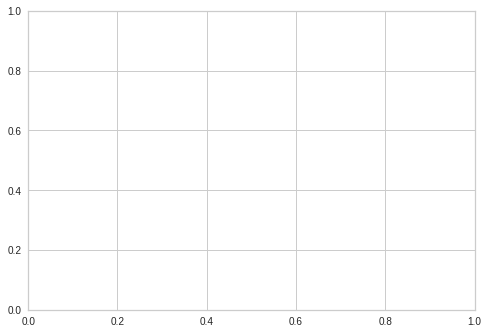

In [15]:
evaluate_model(tuned_lin_reg)

In [16]:
# interpret_model(tuned_lin_reg)

### Predict on Test Data

In [17]:
predict_model(tuned_lin_reg);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,2.2283,22.5081,4.7443,0.1010,0.8401,0.8971


### Finalize and Save Model

In [18]:
# save_model(tuned_lin_reg, 'pycaret_lin_reg')